In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib notebook

In [2]:
# 100Hz 51 Woman extracted from 03:15:00 to 03:45:00 C3-A1 52 115 
eeg = pd.read_csv(os.path.join('data','spindle','eeg.txt'))
eeg

,c3a1
0,-0.9562
1,-0.8962
2,-3.1877
3,-4.1783
4,-5.3190
5,-6.1896
6,-7.8006
7,-6.9701
8,-0.7061
9,2.3058


In [3]:
x = eeg['c3a1']
fs = 100
N = len(x)
t = np.arange(N)/fs
x.index = t

<IPython.core.display.Javascript object>


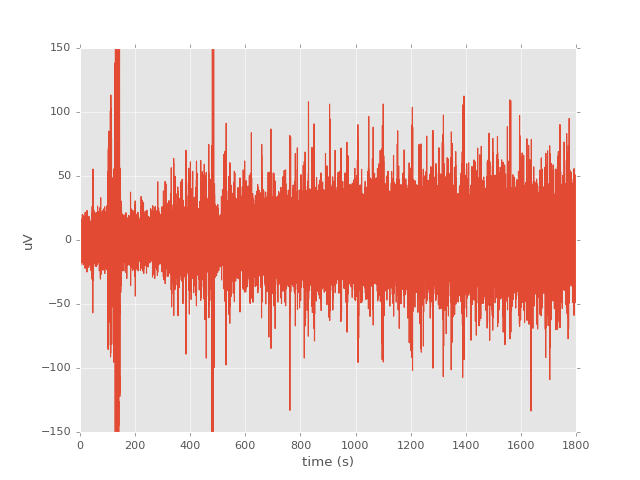

(-150, 150)

In [4]:
plt.figure()
plt.plot(t,x)
plt.xlabel('time (s)')
plt.ylabel('uV')
plt.ylim(-150,150)

In [5]:
Nw = 100 # Number of wanted windows
w = np.reshape(x, (Nw, -1))
Nt = w.shape[1]
tw = t[:Nt]
print(Nt, tw)

1800 [  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   1.79700000e+01
   1.79800000e+01   1.79900000e+01]


<IPython.core.display.Javascript object>


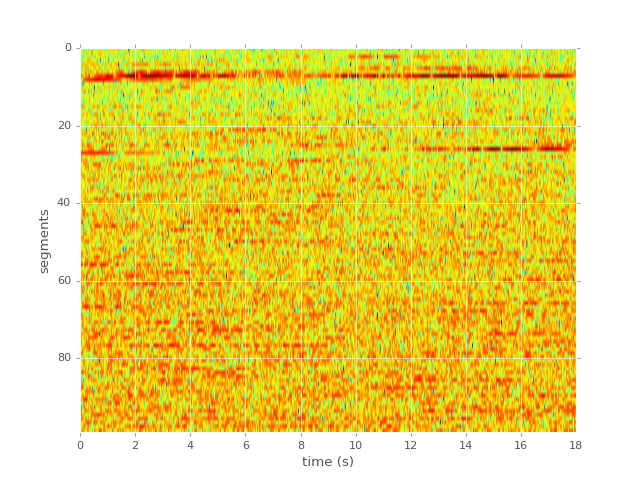

In [6]:
plt.figure()
plt.imshow(np.log(w*w), extent=(tw[0],tw[-1],Nw-1,0))
plt.axis('tight')
plt.xlabel('time (s)')
plt.ylabel('segments')

In [7]:
W = np.fft.fft(w) # By default, applied on last axe (axes=-1)
W = np.fft.fftshift(W, axes=-1) # By default, applied on ALL axes
f = np.fft.fftfreq(Nt, 1/fs)
f = np.fft.fftshift(f, axes=-1)

<IPython.core.display.Javascript object>


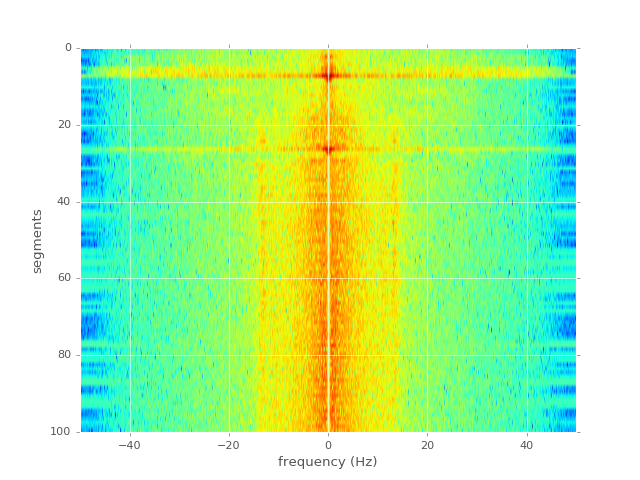

In [8]:
plt.figure()
plt.imshow(np.log(np.abs(W)), extent=(f[0],f[-1],Nw,0))
plt.axis('tight')
plt.xlabel('frequency (Hz)')
plt.ylabel('segments')